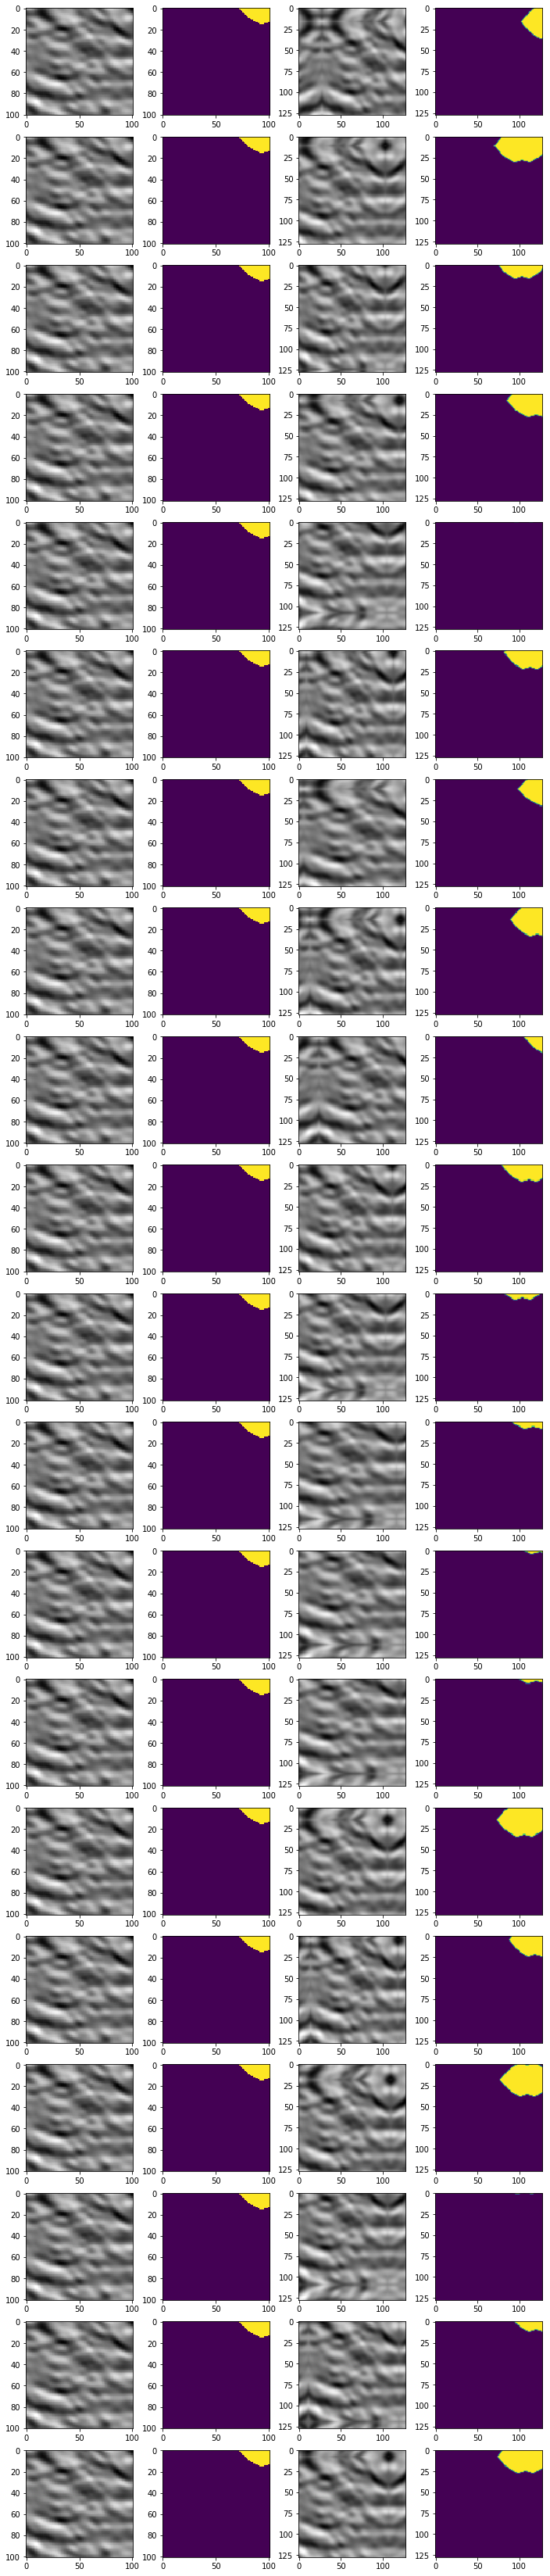

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from ela import transformations, generator, random

import datasets
import utils



transforms_train = generator.TransformationsGenerator([
    
])

samples = utils.get_train_samples()
dataset = datasets.ImageDataset(samples, './data/train', transforms_train)


transforms = generator.TransformationsGenerator([
    transformations.Resize(
        (128, 128),
        **{
            'mode': 'edge',
            'cval': 0,
            'order': 1,
            'clip': False,
            'preserve_range': True
        }
    ),
    random.RandomAffine(
        image_size=128,
        translation=lambda rs: (rs.randint(-20, 20), rs.randint(-20, 20)),
        scale=lambda rs: (rs.uniform(0.95, 1.25), 1),
        **{
            'mode': 'reflect',
            'cval': 0,
            'order': 1,
            'clip': False,
            'preserve_range': True
        }
    ),
])


rows = 20
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

for i in range(rows):
    img, mask = dataset[1]

    img = img.permute(1, 2, 0).numpy()
    mask = mask.squeeze().numpy()
    t = next(transforms)

    ax[i][0].imshow(img)
    ax[i][1].imshow(mask)
    ax[i][2].imshow(t(img))
    ax[i][3].imshow(t(mask))